### 사전 준비

In [31]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mbl
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# 머신러닝 패키지 추가
import statsmodels.api as sm # 안쓸껄?
import sklearn as sk

In [33]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

## 마켓에서 판매할 생선종류
- 생선종류
    - Bream : 도미
    - Roach : 유럽잉어
    - Whitefish : 송어
    - Parkki : 곤들메기(Abramis bjoerkna) 
    - Perch : 농어
    - Pike : 강꼬치고기
    - Smelt : 빙어

### 도미 데이터 로드

In [34]:
# Bream(도미) 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                            31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                            35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                            500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                            700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#### 산점도(Scatter Plot)

##### 도미의 길이당 무게의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

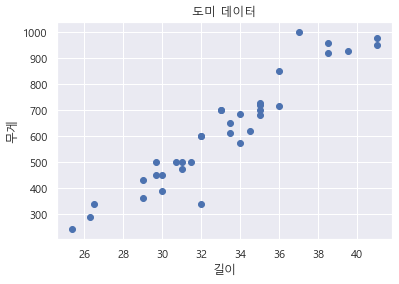

In [35]:
plt.Figure(figsize=(10,5))
plt.scatter(x=bream_length, y=bream_weight)
plt.title('도미 데이터')
plt.xlabel('길이') # x축 라벨
plt.ylabel('무게')  # y축 라벨
plt.grid(color='white') # 그리드 추가 설정
plt.show

# 35마리 도미의 산점도!!

### 빙어(Smelt) 데이터 로드

#### 참조링크 : https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/1-3.ipynb

In [36]:
# 빙어데이터 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 빙어 산점도(도미 산점도 같이 비교)

빙어와 도미 데이터로 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

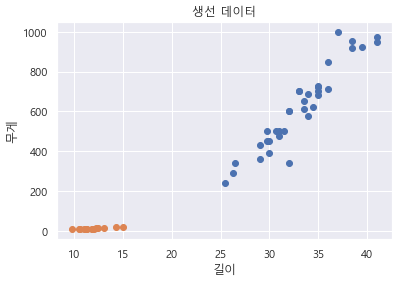

In [37]:
plt.Figure(figsize=(10,5))
plt.scatter(x=bream_length, y=bream_weight)
plt.scatter(x=smelt_length, y=smelt_weight)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게') 
plt.grid(color='white') # 그리드 추가 설정
plt.show

## 머신러닝 시작!

### k-최근접 이웃 알고리즘 KNN(K-Nearst Neighbors)

#### 도미/빙어 데이터 결합

In [38]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [39]:
type(fish_length)

list

In [40]:
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


#### 데이터프레임으로 seaborn에서 산점도 그릴수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

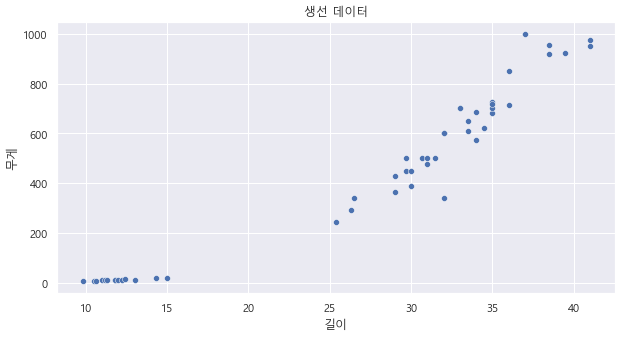

In [42]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, x=0, y=1)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게') 
plt.grid(color='white') # 그리드 추가 설정
plt.show

#### 1차원 리스트 2개 -> 2차원 리스트 변경

In [25]:
# 2차원 배열 사용
fish_data = [[l,w]for l,w in zip(fish_length, fish_weight)]

fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [26]:
# 판다스 데이터 프레임 사용
df=pd.DataFrame(fish_data)
df.head()

,0,1
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [27]:
# 넘파이로 사용해도 무방
df.to_numpy()

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


#### 최근접 이웃 알고리즘

#### 머신러닝
- 데이터(특징) > 길이,무게
- 타겟값

#### 생선데이터 / 타겟 정리

In [43]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [47]:
fish_target = [1]*35 + [0]*14 #1은 도미, 0은 빙어
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 사이킷런 K-최근접 이웃 알고리즘 클래스
K-최근접 이웃 분류 모델

n_neighbors 기본값 5

KNeighborsClassifier 임포트

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
Kn = KNeighborsClassifier()
Kn.fit(X=fish_data, y=fish_target) # 훈련,,처음 인덱스는 도미다..계속 집어넣음

KNeighborsClassifier()

In [58]:
# 훈련 결과값의 정확도 확인 : 100%
Kn.score(X=fish_data, y=fish_target)

1.0

#### KNN 재확인

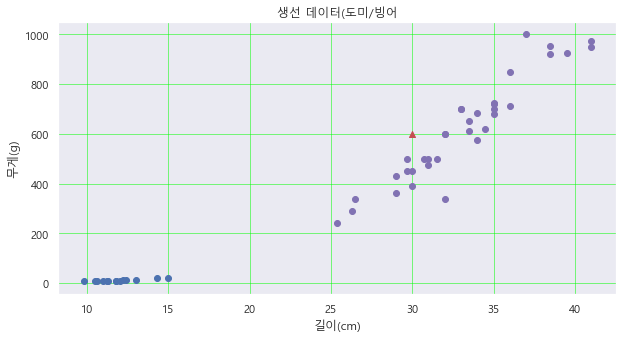

In [95]:
plt.figure(figsize=(10,5))
plt.scatter(x=bream_length, y=bream_weight, color='m')
plt.scatter(x=smelt_length, y=smelt_weight)
# 의문 물고기를 하나 추가
plt.scatter(x=30.0, y=600.0, marker='^', color='r')
plt.title('생선 데이터(도미/빙어')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.grid(color='lime', linewidth='0.5', linestyle='-')
plt.show( )

##### 예측시작

In [65]:
Kn.predict([[30,600]])
# 1=도미, 0=빙어

array([1])

#### 추가사항

In [72]:
print(Kn._fit_X)  # 훈현한 생선 데이터 그대로~

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [75]:
print(Kn._y)  # 훈현한 타겟값 그대로~

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


#### K-최근접 이웃 알고리즘
최근접으로 사용하는 갯수 5개

최근접값 쓸 파라미터를 40개 -> 몇개로 하는지도 중요!!

In [86]:
Kn40 = KNeighborsClassifier(n_neighbors=40) # 10개로 하면 1.0으로 나옴

In [87]:
Kn40.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=40)

In [88]:
Kn40.score(fish_data, fish_target)
# 1.0 -> 0.71

0.7142857142857143

In [89]:
print(35/49)
# 49개로 해도 비슷하다는 말

0.7142857142857143


도미의 특성인 길이와 무게로 봤을때 분명 상관관계가 있음

이 데이터로 훈련을 시키면 확률로서 예측 가능하다!!

머신러닝 알고리즘 객체를 모듈이라 함

<참고>
* 산점도 색상변화 : https://matplotlib.org/stable/gallery/color/named_colors.html